### Import Packages 

In [2]:
import numpy as np
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
# from matplotlib import colors
# from matplotlib.ticker import PercentFormatter

### Load Data

In [3]:
DataSet_Path = r"C:\Users\asus\Desktop\MAHDI,Central\Programming\github\Repositories\AI\7- RFM\Train.xlsx"
Sales_DataSet = pd.read_excel(DataSet_Path)
Sales_DataSet = Sales_DataSet.iloc[:,:5] # ignore 'Suspicious' column
Sales_DataSet.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue
0,Rep10101,C21116,PR6112,182,1665
1,Rep10102,C21116,PR6112,182,1740
2,Rep10103,C21116,PR6253,101,1040
3,Rep10104,C21116,PR6253,283,4495
4,Rep10105,C21116,PR6294,108,1465


### Unique Value

In [4]:
unique_counts = PrettyTable()
unique_counts.field_names = ["Feature", "Unique Value"]

for column in Sales_DataSet.columns:
    count = Sales_DataSet[column].nunique()
    unique_counts.add_row([column, count])


print(unique_counts)    


+-----------------+--------------+
|     Feature     | Unique Value |
+-----------------+--------------+
|     ReportID    |    42582     |
|  SalesPersonID  |     992      |
|    ProductID    |     593      |
|     Quantity    |     6493     |
| TotalSalesValue |     7665     |
+-----------------+--------------+


### Sellers per Quantity
    - Total number of sales of a particular Seller
    - Ranking the Sellers, and show top 10 of them in bar chart

1829
{'C21116': 1829, 'C21918': 8660, 'C22276': 18885, 'C21820': 793933, 'C21976': 154931, 'C21829': 532459, 'C22243': 196037, 'C21135': 189041, 'C22184': 254938, 'C22190': 226368, 'C21146': 65042, 'C21132': 13918, 'C21284': 4168, 'C22008': 1597, 'C22126': 224249, 'C21535': 144242, 'C21167': 72125, 'C22085': 2039, 'C22239': 10105, 'C22049': 42201, 'C22042': 13945, 'C21327': 848, 'C22209': 284307, 'C21221': 13026, 'C21898': 121022, 'C21991': 13440, 'C21865': 21018, 'C22336': 60374, 'C22315': 151961, 'C21283': 68422, 'C22058': 379602, 'C22320': 24019, 'C21186': 577358, 'C22000': 6831, 'C22230': 108385, 'C22117': 121558, 'C22044': 216964, 'C21885': 30322, 'C22037': 117595, 'C21884': 162108, 'C22068': 50848, 'C22319': 223024, 'C22199': 60615, 'C22325': 16053, 'C22200': 555363, 'C22185': 1173587, 'C21848': 31235, 'C22030': 5525254, 'C21845': 38954, 'C22122': 68799, 'C22215': 89268, 'C22198': 39812, 'C22197': 1095771, 'C22196': 751733, 'C21824': 545397, 'C22327': 1039263, 'C22328': 163435, '

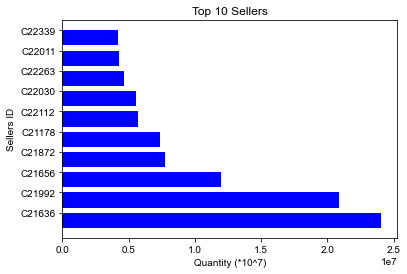

In [5]:

salesPerson_unique = list(Sales_DataSet.SalesPersonID.unique())

SalesPersonID_per_Quantity = Sales_DataSet[["Quantity", "SalesPersonID"]]


QuantitySum_unique_forEachSalesPerson = []
for Person in salesPerson_unique:
        
    ListOfQuantityOfPerson = SalesPersonID_per_Quantity["Quantity"][(SalesPersonID_per_Quantity["SalesPersonID"]==Person)]
    
    QuantitySum_unique_forEachSalesPerson.append(sum(ListOfQuantityOfPerson))
    
    
    
# Total number of sales of a particular Seller
SellerID = "C21116" 
UniqueSalesPersonID_per_SumOfQuantity = dict(zip(salesPerson_unique, QuantitySum_unique_forEachSalesPerson))
print(UniqueSalesPersonID_per_SumOfQuantity[SellerID])


print(UniqueSalesPersonID_per_SumOfQuantity)

# Ranking of Sellers
Top10_Sellers = sorted(UniqueSalesPersonID_per_SumOfQuantity.items(), key=lambda user:user[1], reverse=True)[:10]
SellersPerQuantity_keys, SellersPerQuantity_values = [ i for i, j in Top10_Sellers], [ j for i, j in Top10_Sellers]

# print(SellersPerQuantity_values[:10])

fig, ax = plt.subplots()    
plt.style.use('seaborn')
width = 0.75 
ind = np.arange(len(SellersPerQuantity_values))
ax.barh(ind, SellersPerQuantity_values, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(SellersPerQuantity_keys, minor=False)
plt.title('Top 10 Sellers')
plt.xlabel('Quantity (*10^7)')
plt.ylabel('Sellers ID')
plt.show()



### 

### Most Popular Products

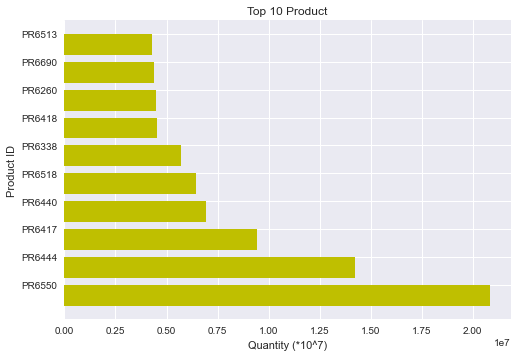

In [6]:
ProductID_unique = list(Sales_DataSet.ProductID.unique())

ProductID_per_Quantity = Sales_DataSet[["Quantity", "ProductID"]]


QuantitySum_unique_forEachProductID = []
for Product in ProductID_unique:
        
    ListOfQuantityOfProduct = ProductID_per_Quantity["Quantity"][(ProductID_per_Quantity["ProductID"]==Product)]
    
    QuantitySum_unique_forEachProductID.append(sum(ListOfQuantityOfProduct))
        
    
# Total number of sales of a particular Product
ProductID = "PR6112" 
UniqueProduct_per_SumOfQuantity = dict(zip(ProductID_unique, QuantitySum_unique_forEachProductID))
# print(UniqueProduct_per_SumOfQuantity[ProductID])



# Ranking of Sellers
Top10_Product = sorted(UniqueProduct_per_SumOfQuantity.items(), key=lambda product:product[1], reverse=True)[:10]
MostPopularProducts_keys, MostPopularProducts_values = [ i for i, j in Top10_Product], [ j for i, j in Top10_Product]

fig, ax = plt.subplots()    
plt.style.use('seaborn')
width = 0.75 
ind = np.arange(len(MostPopularProducts_values))
ax.barh(ind, MostPopularProducts_values, width, color="y")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(MostPopularProducts_keys, minor=False)
plt.title('Top 10 Product')
plt.xlabel('Quantity (*10^7)')
plt.ylabel('Product ID')
plt.show()



### Most Trend Buying Number (NOT COMPLITED)

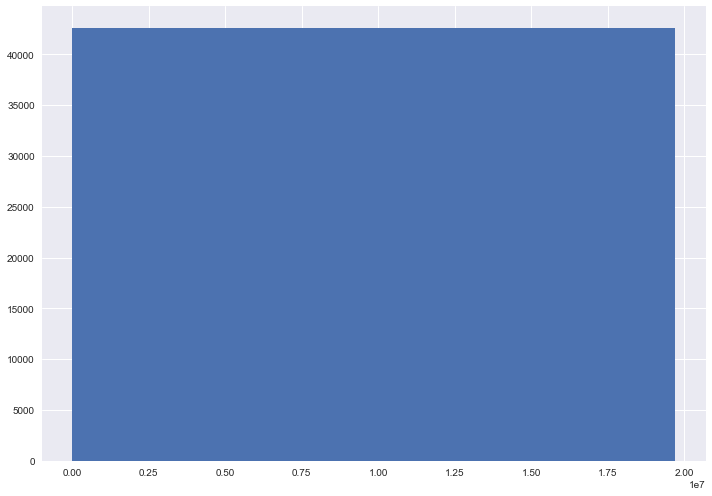

In [7]:

# y = .8 ** x + np.random.randn(10000) + 25

fig, axs = plt.subplots(1, 1,
						figsize =(10, 7),
						tight_layout = True)

n_bins = 1
axs.hist(Sales_DataSet["Quantity"], bins = n_bins)

# Show plot
plt.show()


### Number of product selling by seller

10


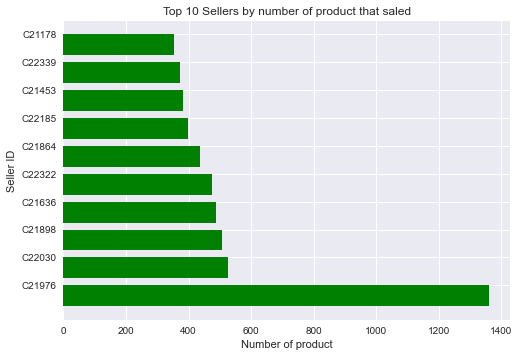

In [8]:
salesPerson_unique = list(Sales_DataSet.SalesPersonID.unique())

QuantityCount_unique_forEachSalesPerson = []
for Person in salesPerson_unique:
        
    ListOfQuantityCountOfPerson = SalesPersonID_per_Quantity["Quantity"][(SalesPersonID_per_Quantity["SalesPersonID"]==Person)]
    
    QuantityCount_unique_forEachSalesPerson.append(len(ListOfQuantityCountOfPerson))
    

# print(QuantityCount_unique_forEachSalesPerson)






# Number of product selling by particular seller
SellerID = "C21116" 
UniqueSalesPersonID_per_CountOfQuantity = dict(zip(salesPerson_unique, QuantityCount_unique_forEachSalesPerson))
print(UniqueSalesPersonID_per_CountOfQuantity[SellerID])




# Ranking of Sellers by number of product that saled
Top10_Sellers = sorted(UniqueSalesPersonID_per_CountOfQuantity.items(), key=lambda user:user[1], reverse=True)[:10]
NumberOfProduct_keys, NumberOfProduct_values = [ i for i, j in Top10_Sellers], [ j for i, j in Top10_Sellers]

fig, ax = plt.subplots()    
plt.style.use('seaborn')
width = 0.75 
ind = np.arange(len(NumberOfProduct_values))
ax.barh(ind, NumberOfProduct_values, width, color="Green")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(NumberOfProduct_keys, minor=False)
plt.title('Top 10 Sellers by number of product that saled')
plt.xlabel('Number of product')
plt.ylabel('Seller ID')
plt.show()


### Clustering and get sellers into group
    - 3 cluster for KMeans and 2 cluster for outlier, 5 cluster in total
        - first outliar cluster : x>IQR
        - secend outliar cluster : x>IQR+Q3

In [32]:
def getOut_Outliar_Cluster4_Cluster5(Data, ColumnIndex): # output -> NewDataSet, Cluster4, CLuster5
    Data = pd.DataFrame(Data) if type(Data)==list  else None
    Q1 = Data[ColumnIndex].describe()["25%"]
    Q3 = Data[ColumnIndex].describe()["75%"]
    IQR = Q3 - Q1
    
    outliers_withIndex_Cluster4 = dict()     
    outliers_withIndex_Cluster5 = dict()     

    
    
    #Cluster 4
    index = 0
    for i in Data[ColumnIndex]:
        if int(i) > int(68028) and i < 139768:
            outliers_withIndex_Cluster4[index] = i
                        
        index += 1


    #Cluster 5
    index = 0
    for i in Data[ColumnIndex]:
        if int(i) > int(139768):
            outliers_withIndex_Cluster5[index] = i
                        
        index += 1
    
    #NewDataSet with out outliar
    QuantitySum_unique_forEachSalesPerson_withOutOutliar = Data
    Cluster4_outliarIndexes = list(outliers_withIndex_Cluster4.keys())
    Cluster5_outliarIndexes = list(outliers_withIndex_Cluster5.keys())
    allIndexesOfoutliars = Cluster4_outliarIndexes + Cluster5_outliarIndexes

    QuantitySum_unique_forEachSalesPerson_withOutOutliar = np.delete(np.array(QuantitySum_unique_forEachSalesPerson_withOutOutliar), allIndexesOfoutliars)
    
    return (QuantitySum_unique_forEachSalesPerson_withOutOutliar), outliers_withIndex_Cluster4, outliers_withIndex_Cluster5
    
    


def NumberOfEachLabel(Model_labels) -> dict:
    
    keys = ("1", "2", "3")
    value = 0
    
    res = dict.fromkeys(keys, value)    
    
    for i in Model_labels:
        if i == 0 : res["1"] += 1
        
        elif i == 1 :res["2"] += 1
        
        elif i == 2 :res["3"] += 1
    
    return res




NewDataSet, Cluster4, Cluster5 = getOut_Outliar_Cluster4_Cluster5(QuantitySum_unique_forEachSalesPerson, 0)


model = KMeans(n_clusters=3)
model = model.fit(scale(NewDataSet).reshape(-1,1))
# print(model.labels_)

print(NumberOfEachLabel(model.labels_)) #1, 2, 3
print(len(Cluster4)) # 4
print(len(Cluster5)) # 5



{'1': 172, '2': 481, '3': 85}
99
155


In [30]:
NewDataSet = np.array(NewDataSet)

print(len(NewDataSet))

index_balancer = 0
for i in Cluster4.items():
    print(i[0], i[1])
    NewDataSet = np.insert(NewDataSet, i[0]+index_balancer, i[1])

    index_balancer += 1
    
# for i in Cluster5.items():
#     # print(i[0], i[1])
#     NewDataSet = np.insert(NewDataSet, i[0], i[1])


print(len(NewDataSet))





a = np.array([1, 2, 4, 5])
a = np.insert(a, 2, 3)

738
16 72125
24 121022
29 68422
34 108385
35 121558
38 117595
49 68799
50 89268
57 110716
58 86155
66 83120
68 79804
69 75843
73 99827
75 80545
76 108086
81 115431
82 110146
92 108356
98 87724
110 117335
122 87264
124 76654
125 118747
126 127791
133 77314
134 75393
144 92942
147 94206
148 80834
159 72722
164 90217
191 88411
215 129107
224 100029
226 83134
230 105320
243 70920
265 86493
269 78726
272 77830
273 121421
282 88207
298 101398
310 104261
317 74574
327 102969
329 97370
346 82732
348 73201
356 132221
378 91343
391 125078
423 72338
465 83580
467 124924
480 77185
484 84249
510 105512
511 93544
513 74228
538 76567
562 113279
563 113451
636 85082
653 114147
664 84264
670 82683
682 84577
689 121768
711 130094
714 135963
736 69184
840 95985


IndexError: index 913 is out of bounds for axis 0 with size 811